In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path1 = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\ML Application and Analysis\ML Atmospheric analysis\Atmospheric Raw Data\sept_finalized_master.csv"
path2 = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\ML Application and Analysis\ML Atmospheric analysis\Atmospheric Raw Data\oct_finalized_master.csv"
path3 = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\ML Application and Analysis\ML Atmospheric analysis\Atmospheric Raw Data\nov_finalized_master.csv"
path4 = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\ML Application and Analysis\ML Atmospheric analysis\Atmospheric Raw Data\dec_finalized_master.csv"

september_data = pd.read_csv(path1)
october_data = pd.read_csv(path2)
november_data = pd.read_csv(path3)
december_data = pd.read_csv(path4)

In [4]:
df = pd.concat([september_data, october_data, november_data, december_data], ignore_index=True)
df.head()

,Timestamp,Level,Temperature,Humidity
0,2022-09-01 00:00:00,500.0,267.635651,16.750164
1,2022-09-01 00:00:00,500.0,267.635651,16.136373
2,2022-09-01 00:00:00,500.0,267.653091,16.750164
3,2022-09-01 00:00:00,500.0,267.653091,16.136373
4,2022-09-01 00:00:00,375.0,250.282867,10.501970


In [5]:
# Remove duplicates
# Drop duplicates from 'Humidity' column while keeping 'Timestamp' and 'Level' unique
df.drop_duplicates(subset=['Timestamp', 'Level', 'Humidity'], inplace=True)
# Group by 'Timestamp' and 'Level', and keep only the second row for 'Humidity'
master_data = df.groupby(['Timestamp', 'Level'], as_index=False).nth(1)

# Print the final result
master_data.head(2)

,Timestamp,Level,Temperature,Humidity
1,2022-09-01 00:00:00,500.0,267.635651,16.136373
5,2022-09-01 00:00:00,375.0,250.282867,12.255937


# Calculate flight Altitude 

The altitude calculation was based on the following resources, which are also utilized for pressure conversion.

* https://www.weather.gov/media/epz/wxcalc/pressureAltitude.pdf
* https://www.weather.gov/media/epz/wxcalc/pressureConversion.pdf
* https://www.weather.gov/media/epz/wxcalc/vaporPressure.pdf
* https://www.weather.gov/media/epz/wxcalc/tempConvert.pdf


In [8]:
def calculate_altitude(Pressure):
    altitude = (1 - ((Pressure) / 1013.25) ** 0.190284) * 145366.45  #  divide presssure 100 to convert it from Pascal to hpa
    return round(altitude, 3)
master_data.loc[:, 'altitude (ft)'] = calculate_altitude(master_data['Level'])
clean_data = master_data.rename(columns={"Humidity": "Relative Humidity"})
clean_data.head(2)

,Timestamp,Level,Temperature,Relative Humidity,altitude (ft)
1,2022-09-01 00:00:00,500.0,267.635651,16.136373,18281.181
5,2022-09-01 00:00:00,375.0,250.282867,12.255937,25051.008


In [9]:
print( round(min(master_data['altitude (ft)']),2))
print( round(max(master_data['altitude (ft)']),2))


18281.18
38615.05


In [ ]:
# Path5 = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\Atmospheric Data Scraper\dewPt_data.csv"
# dewptData = pd.read_csv(Path5)
# dewptData

In [ ]:
# dewptData['Timestamp'] = pd.to_datetime(dewptData['Timestamp'])

# # Converting timestamp format 
# dewptData['Timestamp'] = pd.to_datetime(dewptData['Timestamp'], format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M:%S')
# df = dewptData[['Timestamp', 'Dew Point Temperature' ]].rename(columns={"Dew Point Temperature": "dewPt"})
# df.groupby('Timestamp').mean().reset_index()

In [ ]:
# dewpt_dict = df.set_index('Timestamp')['dewPt'].to_dict()
# # Mapping the dewpt data to master_data based on the 'Timestamp'
# master_data['Dewpt'] = master_data['Timestamp'].map(dewpt_dict)
# # master_data

# Mapping Image Data from sky Metada 

In [10]:
path6 = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\Metadata Cleanup\SkyConditionData_cleaned.csv"
imagedata= pd.read_csv(path6)
imagedata.rename(columns={"Datetime": "Timestamp"}, inplace=True)
imagedata.head(3)

,Timestamp,Image Present,Low/Mid Clouds (%),High Cirrus (%),Long-lived Contrails (Count),Contrail-Cirrus (Count),Day Low/Mid,Day Count Cirrs,Day Count Cont LL,Day Count Cont-Cirrus
0,2022-09-01 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-01 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-01 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
imagedata.isnull().sum()

Timestamp                          0
Image Present                      0
Low/Mid Clouds (%)              1354
High Cirrus (%)                 1625
Long-lived Contrails (Count)    1670
Contrail-Cirrus (Count)         1668
Day Low/Mid                     2569
Day Count Cirrs                 2569
Day Count Cont LL               2569
Day Count Cont-Cirrus           2569
dtype: int64

In [9]:
# clean_data = master_data.groupby(['Timestamp', 'Level']).mean().reset_index()
# clean_data

In [22]:
clean_data['Timestamp'] = pd.to_datetime(clean_data['Timestamp'])
imagedata['Timestamp'] = pd.to_datetime(imagedata['Timestamp'])

clean_data.dtypes
imagedata.dtypes

Timestamp                       datetime64[ns]
Image Present                          float64
Low/Mid Clouds (%)                     float64
High Cirrus (%)                        float64
Long-lived Contrails (Count)           float64
Contrail-Cirrus (Count)                float64
Day Low/Mid                            float64
Day Count Cirrs                        float64
Day Count Cont LL                      float64
Day Count Cont-Cirrus                  float64
dtype: object

In [38]:
# Convert 'Timestamp' column to datetime type in both DataFrames
clean_data['Timestamp'] = pd.to_datetime(clean_data['Timestamp'])
imagedata['Timestamp'] = pd.to_datetime(imagedata['Timestamp'])

image_dict = imagedata.set_index('Timestamp')['Image Present'].to_dict()
# clean_data['Image Present'] = clean_data['Timestamp'].map(image_dict)
# clean_data.tail(50)

In [24]:
# Create a new column 'Image Present' in 'clean_data' and map the values from 'image_dict'
clean_data['Image Present'] = clean_data['Timestamp'].map(image_dict)

# Print the 'clean_data' DataFrame with the 'Image Present' column updated
clean_data.head(3)

,Timestamp,Level,Temperature,Relative Humidity,altitude (ft),Image Present
53,2022-09-01 01:00:00,500.0,267.690735,15.713322,18281.181,0.0
57,2022-09-01 01:00:00,475.0,264.653305,13.301727,19515.537,0.0
61,2022-09-01 01:00:00,450.0,261.224030,13.430310,20803.669,0.0


In [37]:
clean_data.round(3).head(3)

,Timestamp,Level,Temperature,Relative Humidity,altitude (ft),Image Present
53,2022-09-01 01:00:00,500.0,267.691,15.713,18281.181,0.0
57,2022-09-01 01:00:00,475.0,264.653,13.302,19515.537,0.0
61,2022-09-01 01:00:00,450.0,261.224,13.430,20803.669,0.0


In [26]:
clean_data.dropna(subset=['Image Present'], inplace=True)

In [27]:
clean_data.isnull().sum()

Timestamp            0
Level                0
Temperature          0
Relative Humidity    0
altitude (ft)        0
Image Present        0
dtype: int64

In [28]:
clean_data.to_csv("clean_atmospheric_data.csv", index=False)

### Attributes relationship Analysis

In [31]:
x= clean_data.Level
x1= clean_data.Temperature
x2=clean_data['Relative Humidity']
y=clean_data['altitude (ft)']

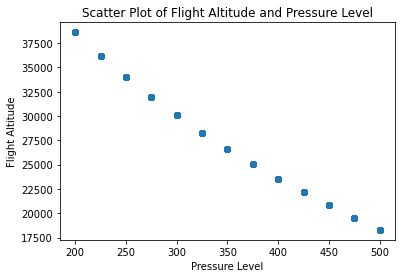

In [32]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('Pressure Level')
plt.ylabel('Flight Altitude')
plt.title('Scatter Plot of Flight Altitude and Pressure Level')
plt.show()


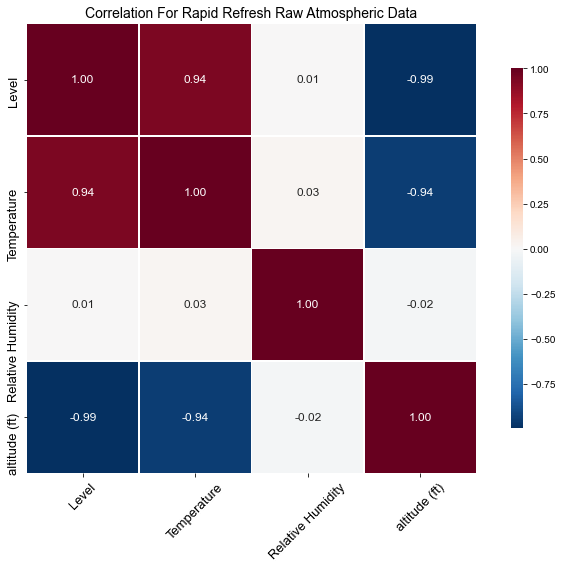

In [36]:
#Plot corrolation Matrix 

corr_data = clean_data[['Level', 'Temperature', 'Relative Humidity','altitude (ft)' ]]
correlation_matrix = corr_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 12}, square=True, cbar=True, cbar_kws={"shrink": 0.8, "aspect": 30})


sns.set_style('white')
sns.set_palette('gray')
plt.grid(False)

plt.title('Correlation For Rapid Refresh Raw Atmospheric Data', fontsize=14)
# Adjust tick label font size and rotation
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13)

# Show the plot
plt.tight_layout()
plt.show()

